# LAB 1 - PTA

Implement a perceptron training algorithm.

*   Compute 2-variables AND, OR, and NOT (1-variable) operations and report the
number of steps (number of weight-updates) required for the convergence.

*   Prove that XOR can’t be computed using PTA.

*Find truth table attached below*

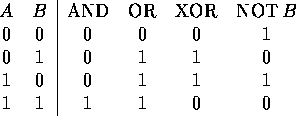

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

Mounted at /content/drive


## INPUT OUTPUT TABLES
0 is replaced by -1.

In [4]:
X_R = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Input
# -------------------------------------------------------
Y_A = np.array([-1, -1, -1, 1]) # AND Output
Y_O = np.array([-1, 1, 1, 1]) # OR Output
X_N = np.array([[0], [1]]) # NOT Input
Y_N = np.array([1, -1]) # NOT Output
# -------------------------------------------------------
Y_X = np.array([-1, 1, 1, -1]) # XOR Output

# PERCEPTRON - PTA Definition

In [8]:
import matplotlib.pyplot as plt
import pickle

class Perceptron():
    def __init__(self, X, Y, nw, gate="AND", max_iter=24, load=False):
        self.X = X # Input Variables.
        self.Y = Y # Output Variables.
        self.nw = nw # Number of weights.
        self.load = load # To train and save or just load weights.
        self.max_iter = max_iter # Maximum number of epochs.
        self.gate = gate # Which gate we are working on -> AND/OR/NOT/XOR
        if load:
            self.w, self.iters = self.load_info()
        else:
            self.w = np.zeros(self.nw + 1) + 0.1 # 1 more for bias. 0.1 as initial weight.
            self.iters = 0

    def perceptron_train(self, draw_line=True):
        """Training the gate weights."""
        self.w = np.zeros(self.nw + 1) + 0.1 # 1 more for bias. 0.1 as initial weight.
        self.iters = 0
        l = len(self.X)
        while self.iters < self.max_iter:
            miss = 0 # Number of misclassified examples.
            for i in range(l):
                x = self.X[i]
                x = np.insert(x, 0, 1)
                y = self.Y[i]
                r = np.dot(self.w.T, x) # Results for weights and inputs.   
                if y * r <= 0: # If misclassified.
                    print("--" * 10)
                    print("LOOP {} WEIGHTS {}".format(self.iters, self.w))
                    self.iters += 1
                    delta = y * x # Weight update delta
                    self.w += delta # Update after misclassification.
                    miss += 1
                    if draw_line: # Draw decision boundaries.
                        self.draw_line(save=True,
                                       name="/content/drive/MyDrive/IIIT_DATA/PGDDSAI/A1/LAB 1 - PTA/plots/" + self.gate + "_" +
                                       str(self.iters-1) + "_boundary.png")
            if not miss:
                break
        self.iters -= 1
        if self.gate != "XOR": # Do not print graphs for XOR.
            self.print_convergence()
            self.save_info()


    def draw_points(self):
        """Draw the Input points."""
        rows, cols = self.X.shape
        x = [i[0] for i in self.X]
        if cols == 1:
            y = [0 for i in range(rows)]
        else:
            y = [i[1] for i in self.X]
        plt.set_cmap('cool')
        plt.scatter(x, y, c=self.Y)
        return plt

    def draw_line(self, save=False, name=""):
        """Draw decision boundaries."""
        self.draw_points()
        if self.w.shape[0] == 3:
            m = -self.w[1] / self.w[2]
            c = -self.w[0] / self.w[2]
        else:
            m = self.w[1]
            c = self.w[0]
        X = np.arange(-0.2, 1.4, 0.1)
        y_hat = m * X + c
        plt.plot(X, y_hat, 'r')
        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.grid()
        if save:
            plt.savefig(name)
        plt.show()

    def print_convergence(self):
        """Print Values."""
        print("--" * 10)
        print("--" * 10)
        print("Gate:{}".format(self.gate))
        print("Converged in {} steps".format(self.iters))
        print("Bias: {}".format(self.w[0]))
        print("Weights: {}".format(self.w[1:]))
        print("--" * 10)
        print("--" * 10)

    def save_info(self):
        """Load """
        info = {
            "gate": self.gate,
            "converged": self.iters,
            "bias_weight": self.w
        }
        with open(self.gate + '_info.pickle', 'wb') as f:
            pickle.dump(info, f)

    def load_info(self):
        with open(self.gate + '_info.pickle', 'rb') as f:
            info = pickle.load(f)
            assert self.gate == info['gate']
            weights = info['bias_weight']
            iters = info['converged']
        return weights, iters

## AND TRAINING

--------------------
LOOP 0 WEIGHTS [0.1 0.1 0.1]


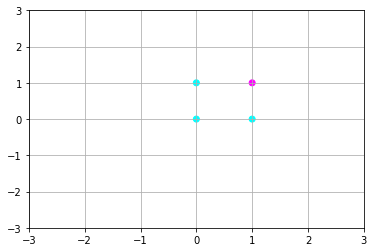

--------------------
LOOP 1 WEIGHTS [-0.9  0.1  0.1]


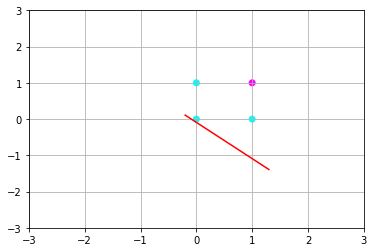

--------------------
LOOP 2 WEIGHTS [0.1 1.1 1.1]


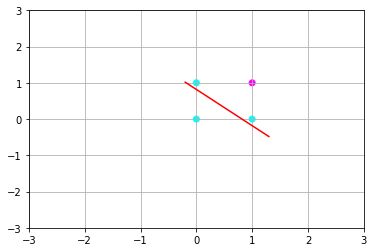

--------------------
LOOP 3 WEIGHTS [-0.9  1.1  1.1]


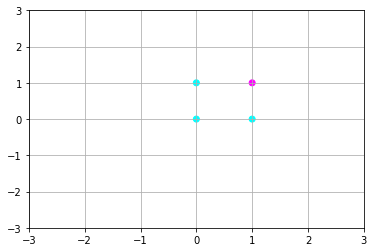

--------------------
LOOP 4 WEIGHTS [-1.9  1.1  0.1]


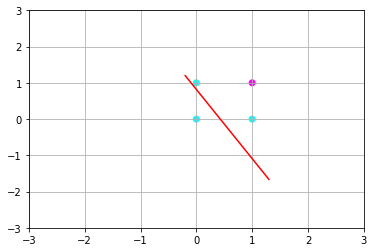

--------------------
LOOP 5 WEIGHTS [-0.9  2.1  1.1]


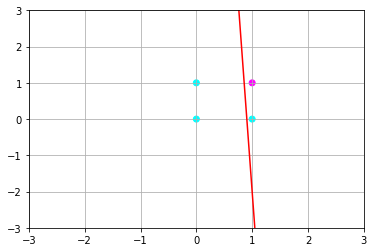

--------------------
LOOP 6 WEIGHTS [-1.9  2.1  0.1]


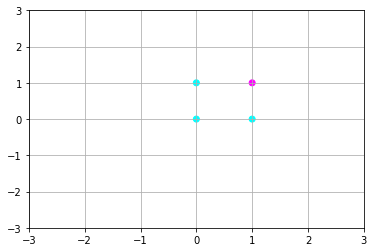

--------------------
LOOP 7 WEIGHTS [-2.9  1.1  0.1]


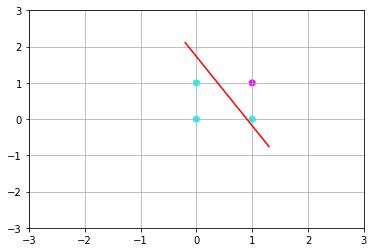

--------------------
LOOP 8 WEIGHTS [-1.9  2.1  1.1]


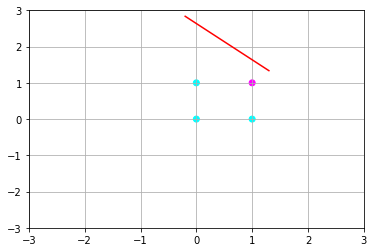

--------------------
LOOP 9 WEIGHTS [-2.9  1.1  1.1]


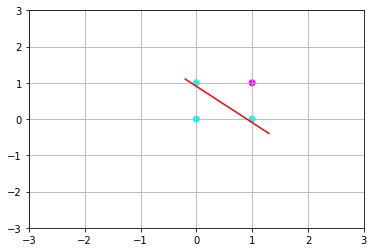

--------------------
LOOP 10 WEIGHTS [-1.9  2.1  2.1]


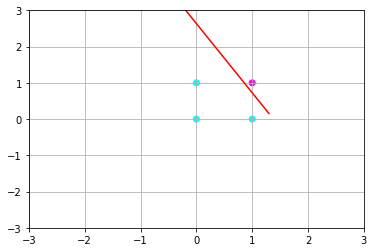

--------------------
--------------------
Gate:AND
Converged in 10 steps
Bias: -2.9
Weights: [2.1 1.1]
--------------------
--------------------


In [9]:
and_pta = Perceptron(X_R, Y_A, 2, "AND")
and_pta.perceptron_train()

## OR TRAINING

--------------------
LOOP 0 WEIGHTS [0.1 0.1 0.1]


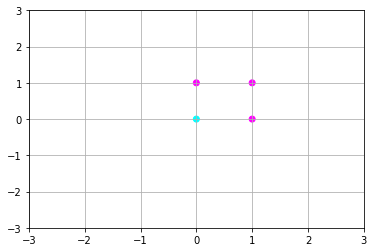

--------------------
LOOP 1 WEIGHTS [-0.9  0.1  0.1]


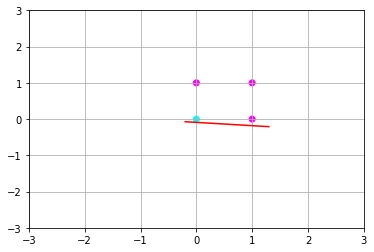

--------------------
LOOP 2 WEIGHTS [0.1 0.1 1.1]


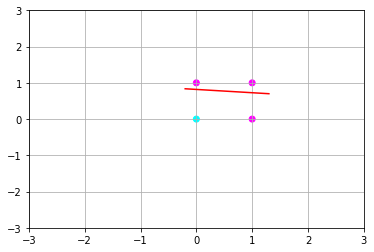

--------------------
LOOP 3 WEIGHTS [-0.9  0.1  1.1]


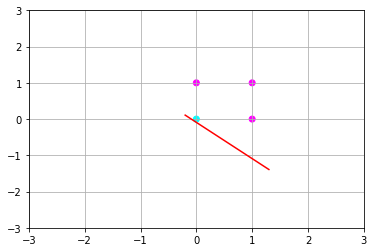

--------------------
LOOP 4 WEIGHTS [0.1 1.1 1.1]


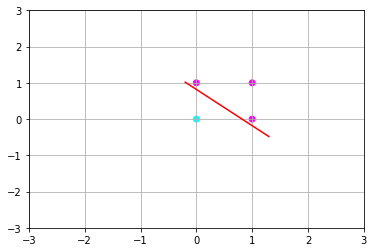

--------------------
--------------------
Gate:OR
Converged in 4 steps
Bias: -0.9
Weights: [1.1 1.1]
--------------------
--------------------


In [10]:
or_pta = Perceptron(X_R, Y_O, 2, "OR")
or_pta.perceptron_train()

## NOT TRAINING

--------------------
LOOP 0 WEIGHTS [0.1 0.1]


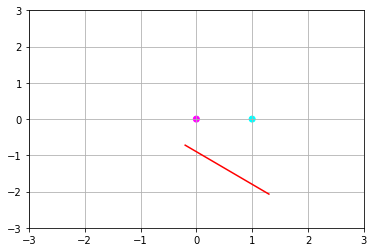

--------------------
LOOP 1 WEIGHTS [-0.9 -0.9]


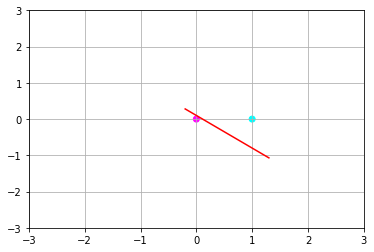

--------------------
--------------------
Gate:NOT
Converged in 1 steps
Bias: 0.09999999999999998
Weights: [-0.9]
--------------------
--------------------


In [ ]:
not_pta = Perceptron(X_N, Y_N, 1, "NOT")
not_pta.perceptron_train()

## LOAD AND PRINT
No training

In [ ]:
xor_pta = Perceptron(X_R, Y_X, 2, "XOR")
xor_pta.perceptron_train(draw_line=False)

--------------------
LOOP 0 WEIGHTS [0.1 0.1 0.1]
--------------------
LOOP 1 WEIGHTS [-0.9  0.1  0.1]
--------------------
LOOP 2 WEIGHTS [0.1 0.1 1.1]
--------------------
LOOP 3 WEIGHTS [-0.9 -0.9  0.1]
--------------------
LOOP 4 WEIGHTS [ 0.1 -0.9  1.1]
--------------------
LOOP 5 WEIGHTS [1.1 0.1 1.1]
--------------------
LOOP 6 WEIGHTS [ 0.1 -0.9  0.1]
--------------------
LOOP 7 WEIGHTS [-0.9 -0.9  0.1]
--------------------
LOOP 8 WEIGHTS [ 0.1 -0.9  1.1]
--------------------
LOOP 9 WEIGHTS [1.1 0.1 1.1]
--------------------
LOOP 10 WEIGHTS [ 0.1 -0.9  0.1]
--------------------
LOOP 11 WEIGHTS [-0.9 -0.9  0.1]
--------------------
LOOP 12 WEIGHTS [ 0.1 -0.9  1.1]
--------------------
LOOP 13 WEIGHTS [1.1 0.1 1.1]
--------------------
LOOP 14 WEIGHTS [ 0.1 -0.9  0.1]
--------------------
LOOP 15 WEIGHTS [-0.9 -0.9  0.1]
--------------------
LOOP 16 WEIGHTS [ 0.1 -0.9  1.1]
--------------------
LOOP 17 WEIGHTS [1.1 0.1 1.1]
--------------------
LOOP 18 WEIGHTS [ 0.1 -0.9  0.1]
--

In [ ]:
and_pta = Perceptron(X_R, Y_A, 2, "AND", load=True)
and_pta.print_convergence()

--------------------
--------------------
Gate:AND
Converged in 10 steps
Bias: -2.9
Weights: [2.1 1.1]
--------------------
--------------------


In [ ]:
or_pta = Perceptron(X_R, Y_A, 2, "OR", load=True)
or_pta.print_convergence()

--------------------
--------------------
Gate:OR
Converged in 4 steps
Bias: -0.9
Weights: [1.1 1.1]
--------------------
--------------------


In [ ]:
not_pta = Perceptron(X_N, Y_N, 1, "NOT", load=True)
not_pta.print_convergence()

--------------------
--------------------
Gate:NOT
Converged in 1 steps
Bias: 0.09999999999999998
Weights: [-0.9]
--------------------
--------------------
